## 1. Import Necessary libraries

In [1]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 2. Import Data

In [2]:
cars_data = pd.read_csv('Cars.csv')
cars_data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


## 3. Data Understanding

### 3.1 Initial Analysis

In [3]:
cars_data.shape

(81, 5)

In [4]:
cars_data.isnull().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [5]:
cars_data.dtypes

HP       int64
MPG    float64
VOL      int64
SP     float64
WT     float64
dtype: object

In [6]:
cars_data.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


### 3.2 ASSUMPTIONS CHECK

#### 3.1 Normality Test

1. Distplot
2. Histogram
3. QQ-Plot
4. Probplot

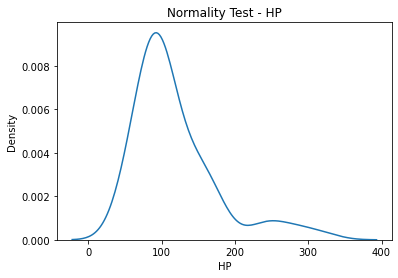

In [7]:
sns.distplot(a=cars_data['HP'],hist=False)
plt.title('Normality Test - HP')
plt.show()

In [10]:
cars_data['HP'].skew()

1.7162163889158817

In [11]:
cars_data['HP'].kurtosis()

2.960024672046334

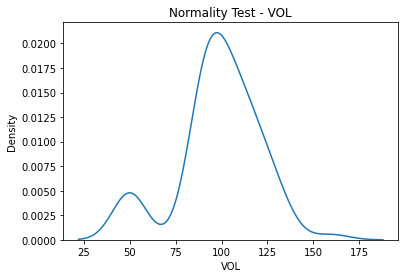

In [13]:
sns.distplot(a=cars_data['VOL'],hist=False)
plt.title('Normality Test - VOL')
plt.show()

In [14]:
cars_data['VOL'].skew()

-0.5901968186877561

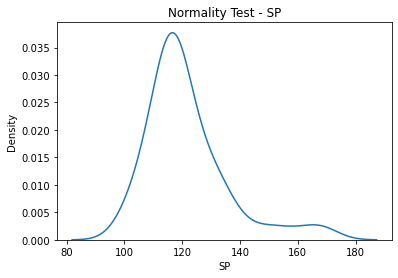

In [15]:
sns.distplot(a=cars_data['SP'],hist=False)
plt.title('Normality Test - SP')
plt.show()

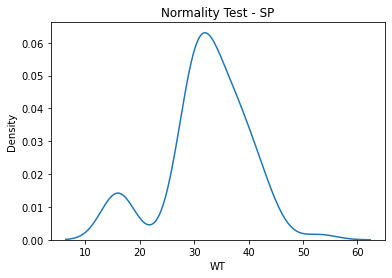

In [16]:
sns.distplot(a=cars_data['WT'],hist=False)
plt.title('Normality Test - SP')
plt.show()

#### Normality Test using Probplot

In [3]:
from scipy import stats

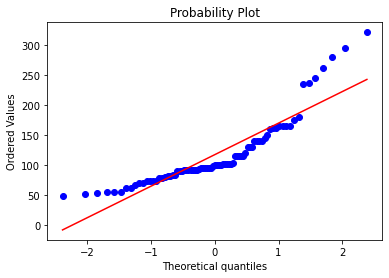

In [31]:
stats.probplot(x = cars_data['HP'],dist='norm',plot=plt)
plt.show()

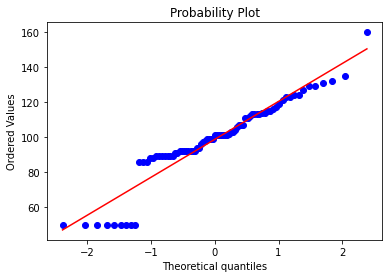

In [32]:
stats.probplot(x = cars_data['VOL'],dist='norm',plot=plt)
plt.show()

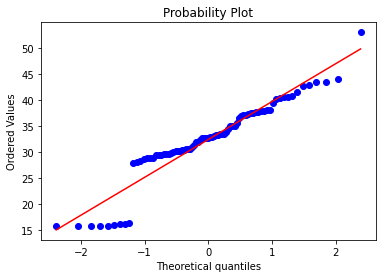

In [33]:
stats.probplot(x = cars_data['WT'],dist='norm',plot=plt)
plt.show()

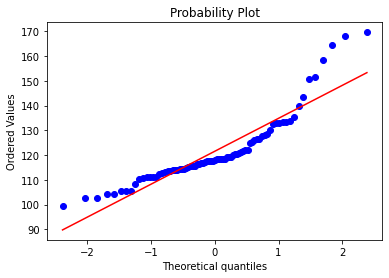

In [34]:
stats.probplot(x = cars_data['SP'],dist='norm',plot=plt)
plt.show()

##### Normality Test is failed.

#### 3. Linearity Test

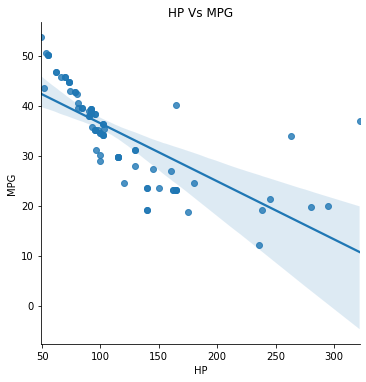

In [18]:
sns.lmplot(x='HP',y='MPG',data=cars_data)
plt.title('HP Vs MPG')
plt.show()

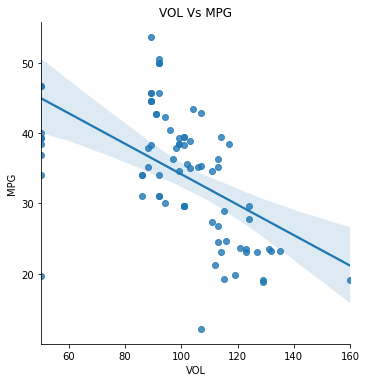

In [20]:
sns.lmplot(x='VOL',y='MPG',data=cars_data)
plt.title('VOL Vs MPG')
plt.show()

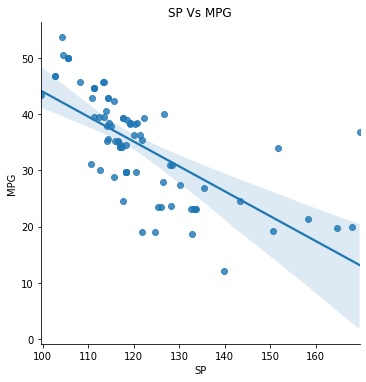

In [21]:
sns.lmplot(x='SP',y='MPG',data=cars_data)
plt.title('SP Vs MPG')
plt.show()

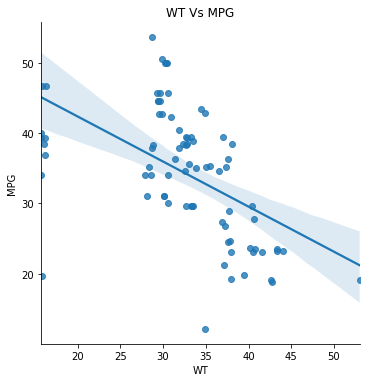

In [22]:
sns.lmplot(x='WT',y='MPG',data=cars_data)
plt.title('WT Vs MPG')
plt.show()

#### Linearity Test Failed.

### 3. Multi-collinearity Test

Can be performed by using 2 techniques:

**1. Correlation Matrix**

**2. Variance Inflation Factor[VIF].**

In [25]:
cars_data_corr_matrix = cars_data.corr().round(2)
cars_data_corr_matrix

,HP,MPG,VOL,SP,WT
HP,1.00,-0.73,0.08,0.97,0.08
MPG,-0.73,1.00,-0.53,-0.69,-0.53
VOL,0.08,-0.53,1.00,0.10,1.00
SP,0.97,-0.69,0.10,1.00,0.10
WT,0.08,-0.53,1.00,0.10,1.00


<AxesSubplot:>

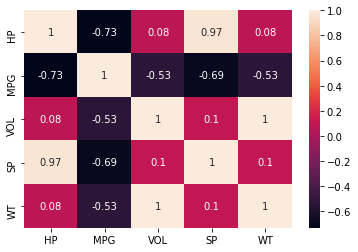

In [27]:
sns.heatmap(cars_data_corr_matrix,annot=True)

##### Multicollinearity problem exists. 

#### 4. Autoregression Test - No time based inputs.

#### 5. Homoscedasticity Check || 6. Zero Residual Check

This can be done post model Training.

## NOTE:

For homoscedasticity check, all your **input features must be in a similar scale.**

## =======================================================================

## Let's create a Reference data to understand how the x features should behave with y.

In [4]:
import numpy as np

In [36]:
cars_data.shape

(81, 5)

In [12]:
X = np.random.randn(81)
y = 10 * X + np.random.randn(81)*2

In [13]:
X_df = pd.DataFrame(data=[X,y]).T
X_df.columns = ['X','y']
X_df

,X,y
0,0.769480,7.600599
1,0.346688,4.496202
2,-0.750207,-7.811097
3,0.551135,5.395802
4,2.517880,25.709865
...,...,...
76,1.189721,8.518311
77,-0.266987,-3.614204
78,-2.042831,-21.012626
79,0.422435,5.840986


### 1. Linearity Test - Passed

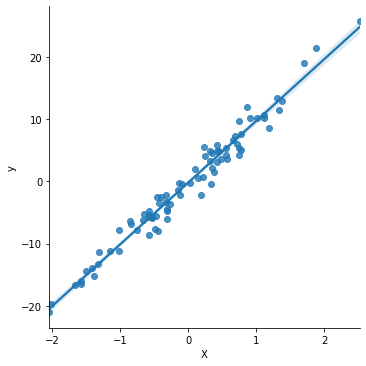

In [14]:
sns.lmplot(x='X',y='y',data=X_df)

### 2. Normality Test - Passed

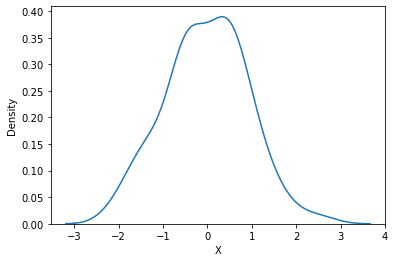

In [16]:
sns.distplot(a=X_df['X'],hist=False)
plt.show()

In [17]:
X_df.skew()

X    0.012861
y    0.135360
dtype: float64

In [18]:
X_df.kurtosis()

X   -0.071859
y    0.143799
dtype: float64

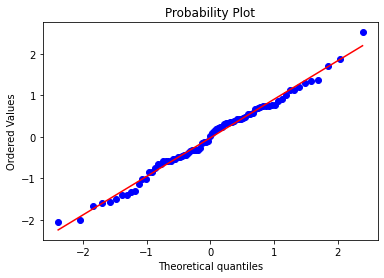

In [19]:
stats.probplot(x = X_df['X'],dist='norm',plot=plt)
plt.show()

### 3. Multicollinearity Test - Passed.

### 4. AutoRegression Test - Passed.

### 5. Homoscedasticity Test || 6. Zero Residual Mean Test

## Model Building

In [28]:
X = X_df[['X']]
y = X_df[['y']]

## Model Training using sklearn library

In [29]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression() #Object Creation/Model Initialization
linear_model.fit(X,y)

LinearRegression()

In [30]:
linear_model.intercept_

array([-0.19280967])

In [34]:
linear_model.coef_

array([[9.91729239]])

## Model Testing

In [36]:
y_pred = linear_model.predict(X)

## Model Evaluation

In [37]:
y

,y
0,7.600599
1,4.496202
2,-7.811097
3,5.395802
4,25.709865
...,...
76,8.518311
77,-3.614204
78,-21.012626
79,5.840986


In [38]:
y_pred

array([[  7.43834747],
       [  3.24539534],
       [ -7.63283168],
       [  5.27295398],
       [ 24.77774541],
       [ -3.36330921],
       [-14.18208865],
       [  4.30611933],
       [-13.1928915 ],
       [  9.7872113 ],
       [  2.19746119],
       [ -5.88900397],
       [-10.29060291],
       [-16.77356122],
       [ -6.72882291],
       [  0.05397063],
       [ -5.98968316],
       [  5.41664841],
       [ 13.05444532],
       [ -3.46578815],
       [ -1.42218001],
       [  4.54880705],
       [ -4.65575864],
       [ -4.99290983],
       [ 10.89093134],
       [-20.14246673],
       [  2.09977551],
       [  3.50908772],
       [  3.95807647],
       [  2.9010162 ],
       [ 18.48063293],
       [-15.79036465],
       [ -1.16369822],
       [  7.12904821],
       [-15.06215102],
       [  1.17320323],
       [-10.34913559],
       [-15.89584205],
       [ 16.72564134],
       [ -6.70498112],
       [ -5.90788887],
       [-13.99747316],
       [  6.38617016],
       [  6

In [39]:
error = y - y_pred
error

,y
0,0.162252
1,1.250806
2,-0.178266
3,0.122848
4,0.932120
...,...
76,-3.087695
77,-0.773605
78,-0.560459
79,1.844386


### 5. Homoscedasticity Check

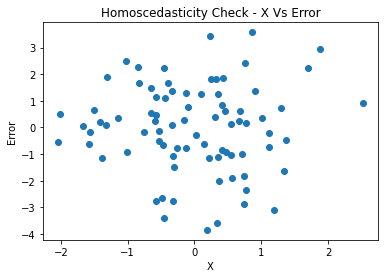

In [42]:
plt.scatter(x = X_df['X'],y = error)
plt.title('Homoscedasticity Check - X Vs Error')
plt.xlabel('X')
plt.ylabel('Error')
plt.show()

### 6. Zero Residual Mean Test

It is a plot between **Actual Output Vs Predicted Plot**.

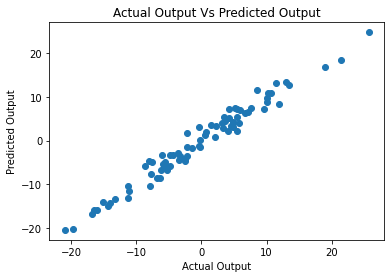

In [43]:
plt.scatter(x = y,y = y_pred)
plt.title('Actual Output Vs Predicted Output')
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.show()

### Zero residual Mean Test is Passed.

## =======================================================================

### COME BACK to CARS DATA

In [44]:
cars_data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


### Model Building

In [79]:
X = cars_data.drop(['MPG'],axis = 1)
y = cars_data[['MPG']]

In [63]:
X.columns

Index(['HP', 'VOL', 'SP', 'WT'], dtype='object')

In [65]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X)
X_scaled = pd.DataFrame(data=X_scaled,columns = X.columns)
X_scaled

,HP,VOL,SP,WT
0,-1.206295,-0.440611,-1.231403,-0.490238
1,-1.100587,-0.305252,-1.140871,-0.261299
2,-1.100587,-0.305252,-1.140871,-0.297993
3,-0.836315,-0.305252,-0.573239,-0.239103
4,-1.135823,-0.305252,-1.211826,-0.338878
...,...,...,...,...
76,3.603442,-2.200268,3.409929,-2.186236
77,2.123523,0.732494,2.060245,0.740025
78,2.563975,-2.200268,2.132755,-2.235028
79,3.127754,0.912972,3.292567,0.941462


#### Before Scaling

In [66]:
X.mean()

HP     117.469136
VOL     98.765432
SP     121.540272
WT      32.412577
dtype: float64

In [67]:
X.std()

HP     57.113502
VOL    22.301497
SP     14.181432
WT      7.492813
dtype: float64

#### After Scaling 

In [68]:
X_scaled.mean()

HP    -1.041691e-16
VOL    5.825244e-17
SP     1.274701e-15
WT     1.170531e-15
dtype: float64

In [69]:
X_scaled.std()

HP     1.006231
VOL    1.006231
SP     1.006231
WT     1.006231
dtype: float64

### Model Training

In [70]:
linear_model_2 = LinearRegression()
linear_model_2.fit(X_scaled,y)

LinearRegression()

In [71]:
linear_model_2.coef_

array([[-11.66095549,  -7.44803145,   5.57581553,   2.98284187]])

In [72]:
linear_model_2.intercept_

array([34.42207573])

### Model Testing

In [73]:
y_pred = linear_model_2.predict(X_scaled)

### Model Evaluation

In [74]:
error_cars = y - y_pred
error_cars

,MPG
0,10.258747
1,7.624608
2,7.734060
3,3.157963
4,8.331584
...,...
76,15.617904
77,1.298838
78,7.863547
79,7.517122


## 5. Homoscedascity Check

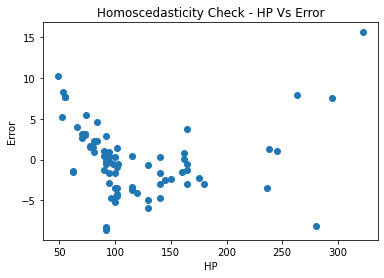

In [75]:
plt.scatter(x = cars_data['HP'],y = error_cars)
plt.title('Homoscedasticity Check - HP Vs Error')
plt.xlabel('HP')
plt.ylabel('Error')
plt.show()

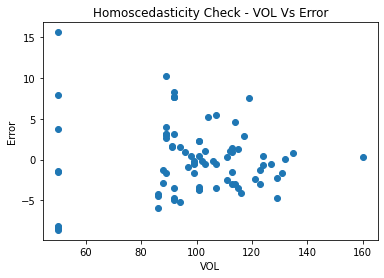

In [76]:
plt.scatter(x = cars_data['VOL'],y = error_cars)
plt.title('Homoscedasticity Check - VOL Vs Error')
plt.xlabel('VOL')
plt.ylabel('Error')
plt.show()

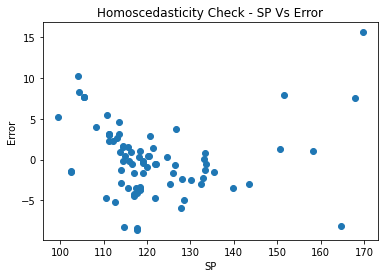

In [77]:
plt.scatter(x = cars_data['SP'],y = error_cars)
plt.title('Homoscedasticity Check - SP Vs Error')
plt.xlabel('SP')
plt.ylabel('Error')
plt.show()

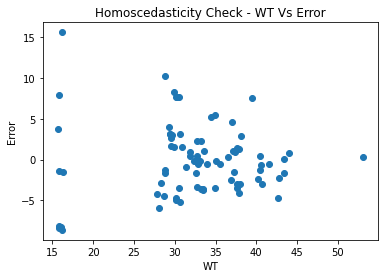

In [78]:
plt.scatter(x = cars_data['WT'],y = error_cars)
plt.title('Homoscedasticity Check - WT Vs Error')
plt.xlabel('WT')
plt.ylabel('Error')
plt.show()

#### Homoscedascity Test Failed.

### 6. Zero Residual Mean Test

It is a plot between **Actual Output Vs Predicted Plot**.

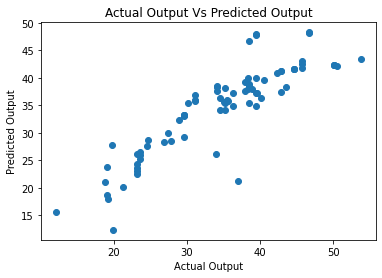

In [80]:
plt.scatter(x = y,y = y_pred)
plt.title('Actual Output Vs Predicted Output')
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.show()

#### Zero Residual Mean Test also Failed.

## =======================================================================

# Model Optimization Techniques

In [4]:
cars_data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


### Model Building | Model Training using Statsmodels

In [5]:
import statsmodels.formula.api as smf

In [6]:
model = smf.ols(formula = 'MPG~VOL+SP+HP+WT', data = cars_data).fit()

In [7]:
model.params

Intercept    30.677336
VOL          -0.336051
SP            0.395627
HP           -0.205444
WT            0.400574
dtype: float64

In [8]:
model.pvalues

Intercept    0.042936
VOL          0.556294
SP           0.014579
HP           0.000001
WT           0.813649
dtype: float64

### ======================================================================================

## Hypothesis Statement

* H0 : This feature is not significant for prediction.
* Ha : This is a significant feature for prediction.
* 5% LOS.

### ======================================================================================

In [36]:
model_1 = smf.ols(formula = 'MPG~HP', data = cars_data).fit()
print('R-square                           : ',round(model_1.rsquared,4))
print('Adjusted R-square                  : ',round(model_1.rsquared_adj,4))
print('Akaike information criterion (AIC) : ',round(model_1.aic,4))
print('Bayesian information criterion(BIC): ',round(model_1.bic,4))

R-square                           :  0.5257
Adjusted R-square                  :  0.5197
Akaike information criterion (AIC) :  530.7453
Bayesian information criterion(BIC):  535.5342


In [37]:
model_2 = smf.ols(formula = 'MPG~HP+SP', data = cars_data).fit()
print('R-square                           : ',round(model_2.rsquared,4))
print('Adjusted R-square                  : ',round(model_2.rsquared_adj,4))
print('Akaike information criterion (AIC) : ',round(model_2.aic,4))
print('Bayesian information criterion(BIC): ',round(model_2.bic,4))

R-square                           :  0.5326
Adjusted R-square                  :  0.5207
Akaike information criterion (AIC) :  531.5481
Bayesian information criterion(BIC):  538.7315


In [38]:
model_3 = smf.ols(formula = 'MPG~HP+SP+WT', data = cars_data).fit()
print('R-square                           : ',round(model_3.rsquared,4))
print('Adjusted R-square                  : ',round(model_3.rsquared_adj,4))
print('Akaike information criterion (AIC) : ',round(model_3.aic,4))
print('Bayesian information criterion(BIC): ',round(model_3.bic,4))

R-square                           :  0.7695
Adjusted R-square                  :  0.7605
Akaike information criterion (AIC) :  476.2993
Bayesian information criterion(BIC):  485.8771


In [39]:
model_4 = smf.ols(formula = 'MPG~HP+SP+VOL', data = cars_data).fit()
print('R-square                           : ',round(model_4.rsquared,4))
print('Adjusted R-square                  : ',round(model_4.rsquared_adj,4))
print('Akaike information criterion (AIC) : ',round(model_4.aic,4))
print('Bayesian information criterion(BIC): ',round(model_4.bic,4))

R-square                           :  0.7704
Adjusted R-square                  :  0.7614
Akaike information criterion (AIC) :  475.9875
Bayesian information criterion(BIC):  485.5653


In [40]:
model_5 = smf.ols(formula = 'MPG~HP+SP+VOL+WT', data = cars_data).fit()
print('R-square                           : ',round(model_5.rsquared,4))
print('Adjusted R-square                  : ',round(model_5.rsquared_adj,4))
print('Akaike information criterion (AIC) : ',round(model_5.aic,4))
print('Bayesian information criterion(BIC): ',round(model_5.bic,4))

R-square                           :  0.7705
Adjusted R-square                  :  0.7585
Akaike information criterion (AIC) :  477.9279
Bayesian information criterion(BIC):  489.9002


### Model_4 is the BEST MODEL.

## Model Building using sklearn library

### 2 Steps approach:
1. Separate your x and y.
2. Model Validation Techniques:
    * Train-Test Split
    * K-Fold CV
    * LOOCV

In [43]:
X = cars_data.drop(['MPG'],axis = 1)
y = cars_data[['MPG']]

In [44]:
X.shape,y.shape

((81, 4), (81, 1))

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,shuffle=True,random_state=None,)

In [50]:
X_train.shape,y_train.shape #Training data

((64, 4), (64, 1))

In [52]:
X_train

,HP,VOL,SP,WT
51,115,101,118.288996,33.436711
68,165,123,133.312342,40.472042
67,165,127,133.680223,41.573975
1,55,92,105.461264,30.466833
62,140,131,126.048103,43.390988
...,...,...,...,...
57,115,101,118.288996,32.734518
69,245,112,158.300669,37.141733
72,162,132,133.140074,43.353123
26,92,117,120.760520,38.062823


In [53]:
y_train

,MPG
51,29.629936
68,23.103172
67,23.103172
1,50.013401
62,23.515917
...,...
57,29.629936
69,21.273708
72,23.203569
26,38.411003


In [51]:
X_test.shape,y_test.shape

((17, 4), (17, 1))

### Model Training

In [54]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

### Model Testing || Model Evaluation

#### Calculate the Error for the Training data 

In [56]:
y_pred_train = linear_model.predict(X_train)

In [67]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [60]:
mean_squared_error(y_train,y_pred_train)

16.0581714671411

In [64]:
mean_absolute_error(y_train,y_pred_train)

3.0262427973231114

#### Calculate the Error for the Test data 

In [58]:
y_pred_test = linear_model.predict(X_test)

In [61]:
mean_squared_error(y_test,y_pred_test)

33.52057820491798

In [66]:
mean_absolute_error(y_test,y_pred_test)

3.6451913544587886

### =========================================================================================

# Model Optimzation Techniques

## TAKEAWAY:

Here wrt to few datapoints, it is evident that most of the input features are not showing direct linear relationship with output varible. So we have to do some transformations to make to linear.

#### Data transformation techniques if the data is CONTINUOUS:

* Log Transformation
* Square Root Transformation
* Cube Root Transformation
* Reciprocal Transformation
* Boxcox Transformation
* Standard Scaler
* Min Max Scaler
* Robust Scaler

#### Data transformation techniques if the data is DISCRETE:

* Label Encoding
* One Hot Encoding

### Applying Log Transformation

In [74]:
X_inputs = cars_data.copy()
X_inputs

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [70]:
import numpy as np

In [75]:
X_inputs['log_HP']  = np.log(X_inputs['HP'])
X_inputs['log_SP']  = np.log(X_inputs['SP'])
X_inputs['log_VOL'] = np.log(X_inputs['VOL'])
X_inputs['log_WT']  = np.log(X_inputs['WT'])
X_inputs

,HP,MPG,VOL,SP,WT,log_HP,log_SP,log_VOL,log_WT
0,49,53.700681,89,104.185353,28.762059,3.891820,4.646172,4.488636,3.359057
1,55,50.013401,92,105.461264,30.466833,4.007333,4.658344,4.521789,3.416639
2,55,50.013401,92,105.461264,30.193597,4.007333,4.658344,4.521789,3.407630
3,70,45.696322,92,113.461264,30.632114,4.248495,4.731461,4.521789,3.422049
4,53,50.504232,92,104.461264,29.889149,3.970292,4.648816,4.521789,3.397495
...,...,...,...,...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947,5.774552,5.133434,3.912023,2.780864
77,238,19.197888,115,150.576579,37.923113,5.472271,5.014472,4.744932,3.635561
78,263,34.000000,50,151.598513,15.769625,5.572154,5.021236,3.912023,2.758086
79,295,19.833733,119,167.944460,39.423099,5.686975,5.123633,4.779123,3.674352


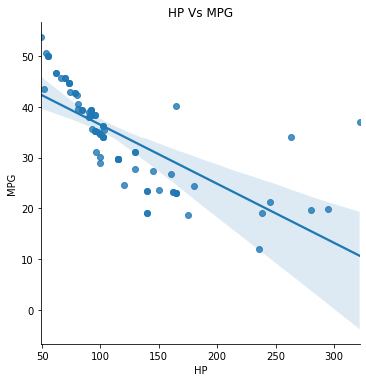

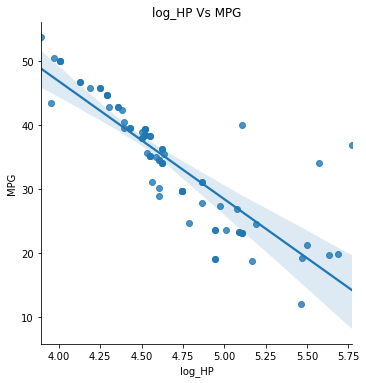

In [77]:
sns.lmplot(x='HP',y='MPG',data=X_inputs)
plt.title('HP Vs MPG')

sns.lmplot(x='log_HP',y='MPG',data=X_inputs)
plt.title('log_HP Vs MPG')
plt.show()

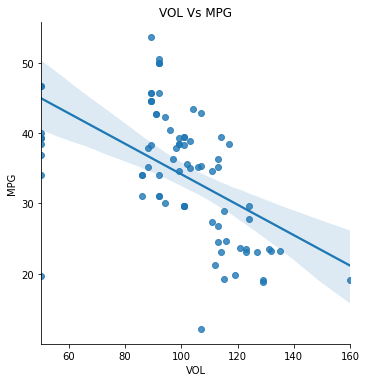

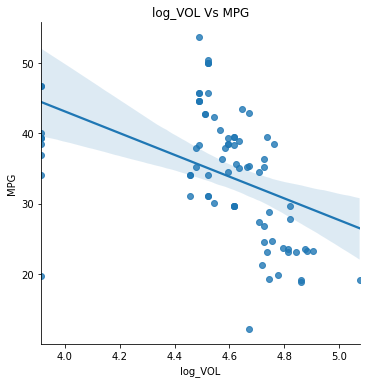

In [78]:
sns.lmplot(x='VOL',y='MPG',data=X_inputs)
plt.title('VOL Vs MPG')

sns.lmplot(x='log_VOL',y='MPG',data=X_inputs)
plt.title('log_VOL Vs MPG')
plt.show()

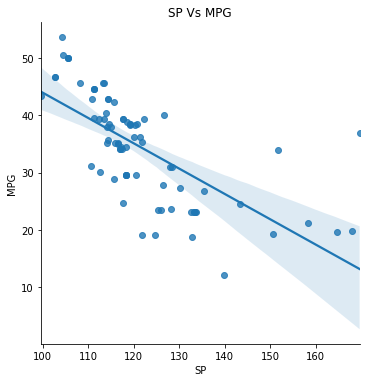

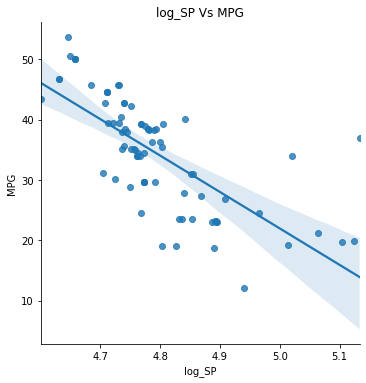

In [79]:
sns.lmplot(x='SP',y='MPG',data=X_inputs)
plt.title('SP Vs MPG')

sns.lmplot(x='log_SP',y='MPG',data=X_inputs)
plt.title('log_SP Vs MPG')
plt.show()

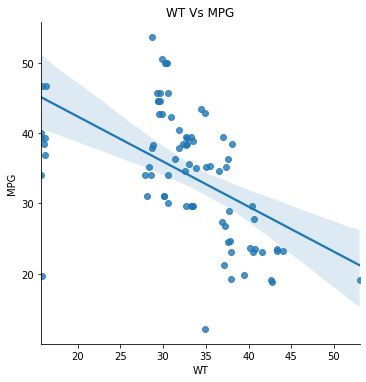

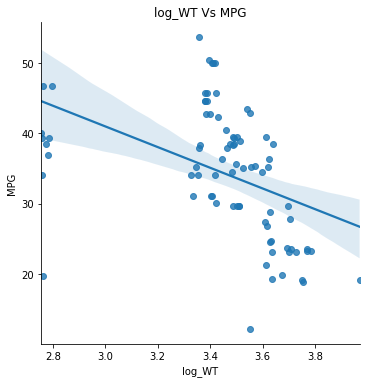

In [80]:
sns.lmplot(x='WT',y='MPG',data=X_inputs)
plt.title('WT Vs MPG')

sns.lmplot(x='log_WT',y='MPG',data=X_inputs)
plt.title('log_WT Vs MPG')
plt.show()

### Model Building

In [83]:
X = X_inputs[['log_HP','log_SP','log_VOL','log_WT']]
y = X_inputs[['MPG']]

In [84]:
X.shape,y.shape

((81, 4), (81, 1))

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,shuffle=True,random_state=None,)

In [86]:
X_train.shape,y_train.shape #Training data

((64, 4), (64, 1))

In [87]:
X_train

,log_HP,log_SP,log_VOL,log_WT
48,4.867534,4.851323,4.454347,3.334723
1,4.007333,4.658344,4.521789,3.416639
12,4.521789,4.804882,4.595120,3.490843
21,4.304065,4.708095,4.672829,3.552722
60,4.976734,4.869139,4.709530,3.607890
...,...,...,...,...
79,5.686975,5.123633,4.779123,3.674352
74,4.941642,4.802907,4.859812,3.752293
16,4.356709,4.739433,4.510860,3.385603
29,4.634729,4.802715,4.672829,3.570922


In [88]:
y_train

,MPG
48,31.014131
1,50.013401
12,39.354094
21,42.828479
60,27.354265
...,...
79,19.833733
74,19.086341
16,42.789909
29,35.404192


In [89]:
X_test.shape,y_test.shape

((17, 4), (17, 1))

### Model Training

In [90]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

### Model Testing || Model Evaluation

#### Calculate the Error for the Training data 

In [91]:
y_pred_train = linear_model.predict(X_train)

In [92]:
y_pred_train

array([[33.64108894],
       [48.28544689],
       [40.45351183],
       [40.19958102],
       [27.04825641],
       [43.84085011],
       [34.03248358],
       [31.86061336],
       [36.06294264],
       [20.43528086],
       [53.33608946],
       [35.40876038],
       [29.60999462],
       [37.03336204],
       [34.211398  ],
       [45.40140824],
       [38.46523959],
       [47.80695313],
       [28.12301831],
       [39.49143362],
       [39.5956065 ],
       [28.80014117],
       [42.17171044],
       [24.07349971],
       [19.89328787],
       [48.7521533 ],
       [42.56887014],
       [26.92843272],
       [31.36859297],
       [23.74078089],
       [46.37796766],
       [42.04907647],
       [15.84612292],
       [28.81897557],
       [36.67973889],
       [33.07797753],
       [30.54771478],
       [36.35347093],
       [28.78527178],
       [29.16526294],
       [49.86631011],
       [50.67400052],
       [42.43489587],
       [23.13721234],
       [33.48224507],
       [38

In [93]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [94]:
mean_squared_error(y_train,y_pred_train)

6.070087614456249

In [95]:
mean_absolute_error(y_train,y_pred_train)

1.6494472177198964

#### Calculate the Error for the Test data 

In [96]:
y_pred_test = linear_model.predict(X_test)

In [97]:
mean_squared_error(y_test,y_pred_test)

15.636969966730923

In [98]:
mean_absolute_error(y_test,y_pred_test)

1.9069117965464377

### Model Building using Statsmodel

In [99]:
model_1 = smf.ols(formula = 'MPG~log_HP', data = X_inputs).fit()
print('R-square                           : ',round(model_1.rsquared,4))
print('Adjusted R-square                  : ',round(model_1.rsquared_adj,4))
print('Akaike information criterion (AIC) : ',round(model_1.aic,4))
print('Bayesian information criterion(BIC): ',round(model_1.bic,4))

R-square                           :  0.7114
Adjusted R-square                  :  0.7078
Akaike information criterion (AIC) :  490.4986
Bayesian information criterion(BIC):  495.2875


In [100]:
model_3 = smf.ols(formula = 'MPG~log_HP+log_SP+log_WT', data = X_inputs).fit()
print('R-square                           : ',round(model_3.rsquared,4))
print('Adjusted R-square                  : ',round(model_3.rsquared_adj,4))
print('Akaike information criterion (AIC) : ',round(model_3.aic,4))
print('Bayesian information criterion(BIC): ',round(model_3.bic,4))

R-square                           :  0.9116
Adjusted R-square                  :  0.9081
Akaike information criterion (AIC) :  398.6808
Bayesian information criterion(BIC):  408.2586


In [101]:
model_5 = smf.ols(formula = 'MPG~log_HP+log_SP+log_VOL+log_WT', data = X_inputs).fit()
print('R-square                           : ',round(model_5.rsquared,4))
print('Adjusted R-square                  : ',round(model_5.rsquared_adj,4))
print('Akaike information criterion (AIC) : ',round(model_5.aic,4))
print('Bayesian information criterion(BIC): ',round(model_5.bic,4))

R-square                           :  0.9118
Adjusted R-square                  :  0.9071
Akaike information criterion (AIC) :  400.5013
Bayesian information criterion(BIC):  412.4736
